In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt
from utils import imread
#from detectBlobs import detectBlobs
from drawBlobs import drawBlobs
from compute_sift import *
import numpy as np
#import cv2
from skimage.color import rgb2gray
from scipy.ndimage import gaussian_laplace
from scipy.ndimage.filters import convolve, generic_filter
%matplotlib inline

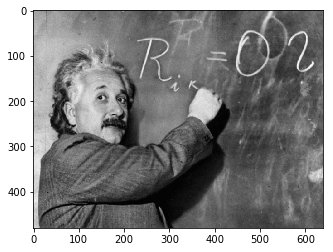

In [2]:
imageName = 'einstein.jpg'
numBlobsToDraw = 500
imName = imageName.split('.')[0]
datadir = os.path.join('..', 'data', 'blobs')
im = imread(os.path.join(datadir, imageName))
plt.imshow(im, cmap='gray')
# BLOBS - n x 5 array with blob in each row in (x, y, radius, angle, score)
#blobs = np.array([im.shape[1]/2, im.shape[0]/2, 100, 1.0])

In [3]:
import sys
def py_im2double(img):
    original_img = img.astype('float')
    img_min, img_max = np.min(im.ravel()), np.max(im.ravel())
    return (original_img - img_min) / (img_max - img_min)
processed_im = py_im2double(rgb2gray(im))
from skimage import feature
blob_location = feature.blob_log(processed_im, threshold = .030, min_sigma=1, max_sigma=55, num_sigma=14)
len(blob_location)

1361

In [6]:
dataDir = os.path.join('..', 'data', 'stitching')
testExamples = ['hill', 'field', 'ledge', 'pier', 'river' 'roofs', 'building', 'uttower']
exampleIndex = 0
imageName1 = '{}1_r.jpg'.format(testExamples[exampleIndex])
imageName2 = '{}2_r.jpg'.format(testExamples[exampleIndex])
im1 = imread(os.path.join(dataDir, imageName1))
im2 = imread(os.path.join(dataDir, imageName2))

processed_im1 = py_im2double(rgb2gray(im1))
processed_im2 = py_im2double(rgb2gray(im2))
blob1 = feature.blob_log(processed_im1, threshold = .030, min_sigma=1, max_sigma=55, num_sigma=14)
blob2 = feature.blob_log(processed_im2, threshold = .030, min_sigma=1, max_sigma=55, num_sigma=14)

In [22]:
#Compute SIFT features
sift1 = compute_sift(im1, blob1[:, 0:3])
sift2 = compute_sift(im2, blob2[:, 0:3])

error: OpenCV(4.1.1) /io/opencv_contrib/modules/xfeatures2d/src/sift.cpp:1207: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'create'


In [19]:
blob1[8, :]

array([ 243.,  357.,    1.])

In [10]:
blob1.shape

(614, 3)